In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("data/sample_dataset.csv")

In [6]:
df


,target,date,user,text,words
0,0,Sat Jun 20 13:59:08 PDT 2009,MonsieurCharles,at home watching Weeds I really want to make m...,home watch Weeds I really want make believe I ...
1,0,Sat Jun 20 04:38:36 PDT 2009,ms_dr_marc,only because of the rain i couldn't play tenni...,rain could n't play tennis today ! !
2,0,Thu Jun 18 22:03:34 PDT 2009,glamonicaa,@tinamarelina Thanks darlin'! They were soaked...,@ tinamarelina Thanks darlin ' ! They soak I g...
3,1,Sat Jun 06 12:12:05 PDT 2009,LynnPiccoli,"Listening to Nat on Perry &amp; Price , singin...","Listening Nat Perry & amp ; Price , sing fav s..."
4,0,Tue Jun 16 16:43:16 PDT 2009,lo_fye,Any #wordpress gurus out there? I upgraded to ...,Any # wordpress guru ? I upgraded 2.8 /feed/ r...
...,...,...,...,...,...
15995,1,Sat May 30 06:08:46 PDT 2009,adrence,@CateP36 Nope. I skipped them. Can't waste my ...,@ CateP36 Nope . I skip . Ca n't waste time .
15996,0,Fri Jun 19 00:24:20 PDT 2009,allyeezy,"so bored. they're drinkinn, im not.","bore . 're drinkinn , im ."
15997,1,Mon Jun 01 02:18:36 PDT 2009,tania_lx,@mileycyrus you earned it!!!! enjoy....,@ mileycyrus earn ! ! ! ! enjoy ....
15998,1,Fri May 29 07:54:02 PDT 2009,notoriousPIG,@RagnarTornquist Think about your poor weapons...,@ RagnarTornquist Think poor weapon guy . He m...


In [7]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
saving_path = 'data/train_df.csv'
train_df.to_csv(saving_path, index=False)

saving_path = 'data/test_df.csv'
test_df.to_csv(saving_path, index=False)

In [9]:
data = pd.read_csv("data/train_df.csv")
data = data.dropna(subset=['words'])
data = data.sample(10000)

In [10]:
data

,target,date,user,text,words
3409,0,Sun May 31 14:22:22 PDT 2009,HennyDiiP,#3wordsduringsex waiit it hurtz,# 3wordsduringsex waiit hurtz
7150,0,Fri Jun 19 05:03:51 PDT 2009,josh_rsnlmbrjk,my last year as a teenager officially begins t...,last year teenager officially begin today ... ...
2506,1,Tue Jun 02 02:02:30 PDT 2009,momoneymixtapes,"@Jassy1015JamZ 749? nice, i like that send me...","@ Jassy1015JamZ 749 ? nice , like send"
8331,0,Mon Jun 15 17:05:22 PDT 2009,JessSek,@whitelight007 And we say that we are working ...,@ whitelight007 And say work Hard ... http : /...
10342,0,Sun Jun 07 05:18:18 PDT 2009,Steffie_squidge,This rain better not be here in 2 weeks my bbq...,This rain well 2 week bbq 's gon na suck other...
...,...,...,...,...,...
9456,0,Thu Jun 18 12:48:13 PDT 2009,a_softer_sin,i cant think of a good name for my hp slash,cant think good name hp slash
8188,0,Sat May 16 20:02:21 PDT 2009,sharmainerae,i wanna re-live May16.. AWESOME. I love Cook ...,wan na re-live May16 .. AWESOME . I love Cook ...
5010,0,Wed Jun 17 02:23:31 PDT 2009,catstress,@emargee me neither - she clearly doesn't love...,@ emargee neither - clearly n't love u much ...
5932,1,Sat Jun 06 11:41:49 PDT 2009,impatrick,At anas party &amp; eating a slice of paradise,At ana party & amp ; eat slice paradise


In [11]:
data['target'].value_counts()

target
0    5018
1    4982
Name: count, dtype: int64

In [12]:
df_neg = data[data['target'] == 0]
df_pos = data[data['target'] == 1]

In [13]:
def compter_mots(phrase):
    mots = phrase.split()
    return len(mots)

df_neg['nombre_de_mots'] = df_neg['text'].apply(lambda x: compter_mots(x))

C:\Users\devil\AppData\Local\Temp\ipykernel_27332\1624786463.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['nombre_de_mots'] = df_neg['text'].apply(lambda x: compter_mots(x))


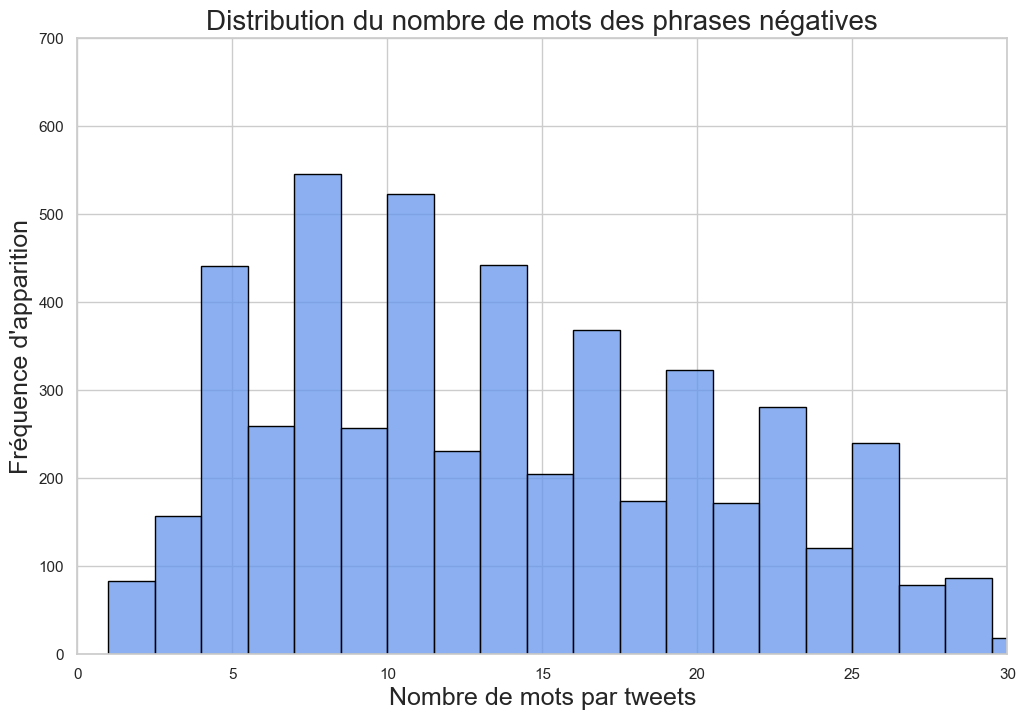

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialiser le style seaborn
sns.set(style="whitegrid")

# Définir la taille de la figure
plt.figure(figsize=(12, 8))

# Créer l'histogramme avec seaborn
sns.histplot(df_neg['nombre_de_mots'], bins=22, kde=False, color='cornflowerblue', edgecolor='black')

# Ajouter le titre et les labels
plt.title('Distribution du nombre de mots des phrases négatives', fontsize=20)
plt.xlabel('Nombre de mots par tweets', fontsize=18)
plt.ylabel("Fréquence d'apparition", fontsize=18)

plt.xlim(0, 30)
plt.ylim(0, 700)

# Afficher le graphique
plt.show()


In [15]:
df_pos

,target,date,user,text,words
2506,1,Tue Jun 02 02:02:30 PDT 2009,momoneymixtapes,"@Jassy1015JamZ 749? nice, i like that send me...","@ Jassy1015JamZ 749 ? nice , like send"
9839,1,Tue Jun 02 16:40:48 PDT 2009,infinitenesmith,I had lots of time with the guinea pigs today....,I lot time guinea pig today . I think I love s...
12551,1,Fri May 29 10:57:07 PDT 2009,MollyFaraday,@thetelevixen I got my floor tickets this morn...,@ thetelevixen I get floor ticket morning ! on...
6015,1,Sat May 02 09:13:27 PDT 2009,daddysgirl_dj,: probably trey songz' biggest fan . not a day...,": probably trey songz ' big fan . day go , don..."
3660,1,Sun Jun 07 04:34:30 PDT 2009,atdominos,I'm at an art gallery! Yay,I 'm art gallery ! Yay
...,...,...,...,...,...
10556,1,Fri May 29 14:13:03 PDT 2009,chathri,@sherrymain maybe just bring tomatoes to throw...,@ sherrymain maybe bring tomato throw ? I 'm t...
1823,1,Sun Apr 19 10:45:34 PDT 2009,adriach,If needed I can be found laying by the pool wi...,If need I found lay pool long book endless mimosa
5533,1,Sat May 30 05:38:27 PDT 2009,twiinkle_toes,Bobbing about to Tribute To House 2! It's cara...,Bobbing Tribute To House 2 ! It 's carazaaay
5932,1,Sat Jun 06 11:41:49 PDT 2009,impatrick,At anas party &amp; eating a slice of paradise,At ana party & amp ; eat slice paradise


C:\Users\devil\AppData\Local\Temp\ipykernel_27332\2947049726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))


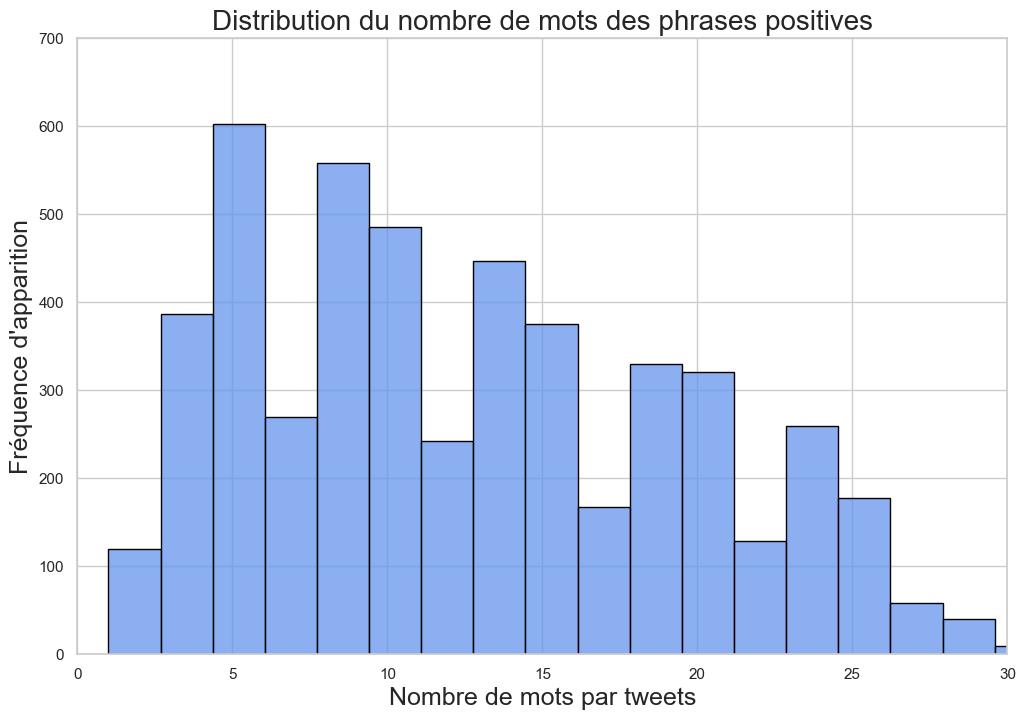

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))
# Initialiser le style seaborn
sns.set(style="whitegrid")

# Définir la taille de la figure
plt.figure(figsize=(12, 8))

# Créer l'histogramme avec seaborn
sns.histplot(df_pos['nombre_de_mots'], bins=22, kde=False, color='cornflowerblue', edgecolor='black')

# Ajouter le titre et les labels
plt.title('Distribution du nombre de mots des phrases positives', fontsize=20)
plt.xlabel('Nombre de mots par tweets', fontsize=18)
plt.ylabel("Fréquence d'apparition", fontsize=18)

plt.xlim(0, 30)
plt.ylim(0, 700)

# Afficher le graphique
plt.show()


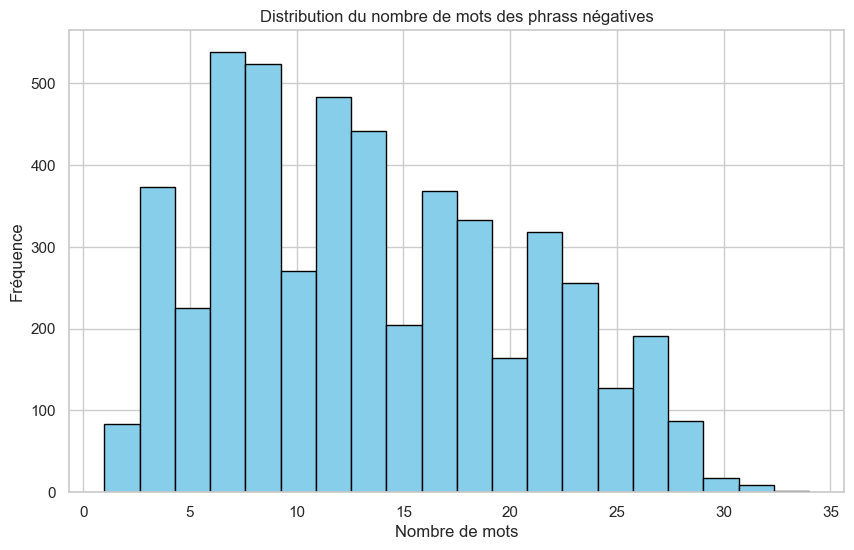

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_neg['nombre_de_mots'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution du nombre de mots des phrass négatives')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

C:\Users\devil\AppData\Local\Temp\ipykernel_27332\2493140727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))


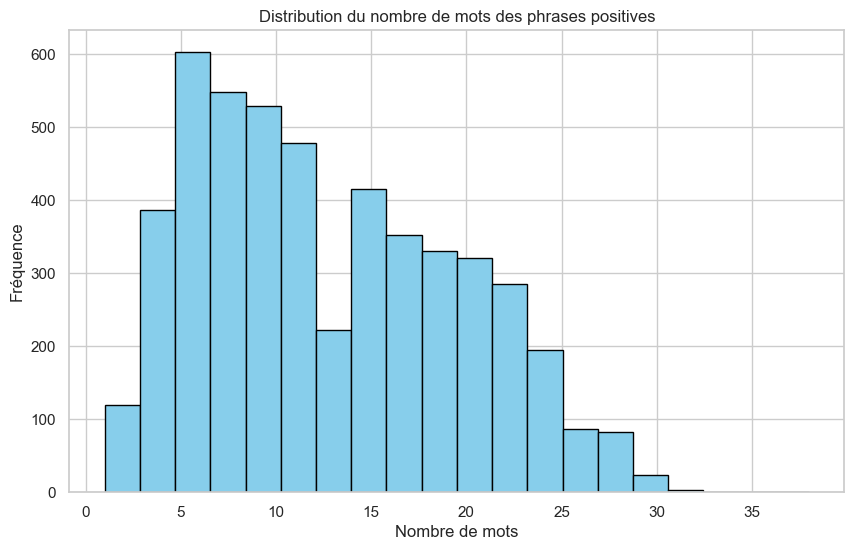

In [18]:
df_pos['nombre_de_mots'] = df_pos['text'].apply(lambda x: compter_mots(x))
plt.figure(figsize=(10, 6))
plt.hist(df_pos['nombre_de_mots'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution du nombre de mots des phrases positives')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

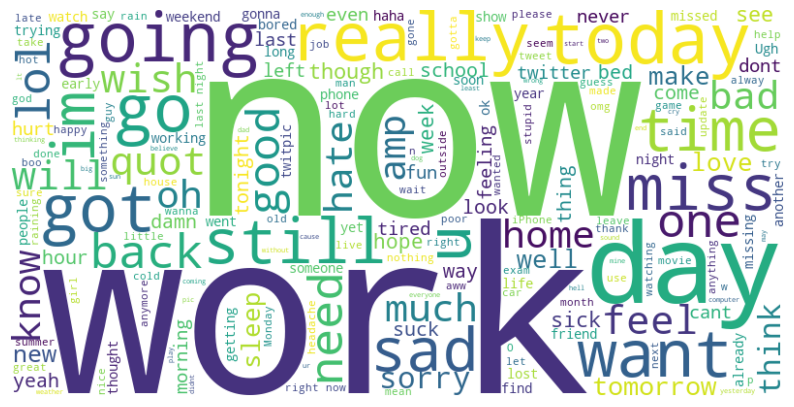

In [19]:
from wordcloud import WordCloud

texte_combine = ' '.join(df_neg['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_combine)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

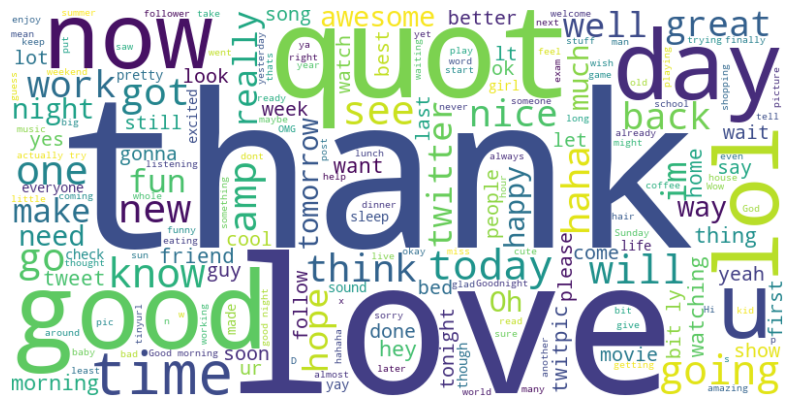

In [20]:
texte_combine = ' '.join(df_pos['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_combine)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
print(data['date'].min())
print(data['date'].max())

Fri Apr 17 20:32:05 PDT 2009
Wed May 27 07:27:28 PDT 2009


In [22]:
sample_df = 'data/dataset.csv'
data.to_csv(sample_df, index=False)